In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
class LinearRegression:
    def __init__(self, x , y):
        self.data = x
        self.label = y
        self.m = 0
        self.c = 0
        self.n = len(x)

    def fit(self , epochs , lr):

        #Implementing Gradient Descent
        for i in range(epochs):
            y_pred = self.m * self.data + self.c

            #Calculating derivatives w.r.t Parameters
            D_m = (-2/self.n)*sum(self.data * (self.label - y_pred))
            D_c = (-1/self.n)*sum(self.label-y_pred)

            #Updating Parameters
            self.m = self.m - lr * D_m
            self.c = self.c - lr * D_c

    def predict(self , inp):
        y_pred = self.m * inp + self.c
        return y_pred

    def mse(self):
        metric = sum((self.label - self.predict(self.data))**2)/self.n
        return metric

    def mae(self):
        metric = sum(abs(self.label - self.predict(self.data)))/self.n
        return metric

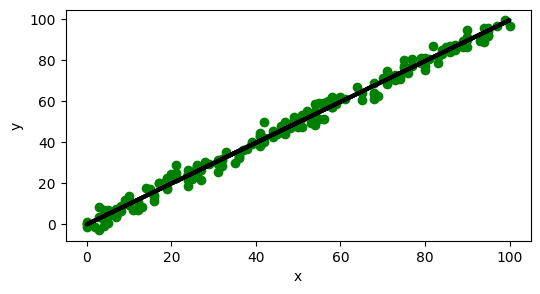

In [ ]:
#df = pd.read_csv('train.csv')
df = pd.read_csv('data_LinearRegression.csv')

#Preparing the data
x = np.array(df.iloc[:,0])
y = np.array(df.iloc[:,1])

#Creating the class object
regressor = LinearRegression(x,y)

#Training the model with .fit method
regressor.fit(1000 , 0.0001) # epochs-1000 , learning_rate - 0.0001

#Prediciting the values
y_pred = regressor.predict(x)

#Plotting the results
plt.figure(figsize = (6,3))
plt.scatter(x,y , color = 'green')
plt.plot(x , y_pred , color = 'k' , lw = 3)
plt.xlabel('x' , size = 10)
plt.ylabel('y', size = 10)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression as SklearnLR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Reshape x for sklearn (sklearn expects 2D input)
x_reshaped = x.reshape(-1, 1)

# Initialize and train sklearn model
sk_model = SklearnLR()
sk_model.fit(x_reshaped, y)

# Predict with sklearn model
sk_pred = sk_model.predict(x_reshaped)

# Print comparison metrics
print("---- Comparison with scikit-learn ----")
print(f"Custom Model MAE: {regressor.mae():.4f}")
print(f"Sklearn Model MAE: {mean_absolute_error(y, sk_pred):.4f}")

print(f"Custom Model MSE: {regressor.mse():.4f}")
print(f"Sklearn Model MSE: {mean_squared_error(y, sk_pred):.4f}")




---- Comparison with scikit-learn ----
Custom Model MAE: 2.2494
Sklearn Model MAE: 2.2493
Custom Model MSE: 7.7870
Sklearn Model MSE: 7.7869
